# Think Stats: Izzy Practice and Notes

National Survey of Family Growth is a cross sectional study (captures group at a snapshot in time). This one is from 2002-2003

2002FemPreg.dct is a Stata dictionary file. 

## Data exploration

In [1]:
import nsfg
df = nsfg.ReadFemPreg()
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


### Column Exploration

Outcome codes 1, 2, 3, 4, 5, 6 indicate live birth, abortion, stillbirth, miscarriage, ectopic preg, current preg.

In [5]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [6]:
df.pregnum.value_counts().sort_index()

1     1267
2     2864
3     3330
4     2444
5     1525
6      900
7      560
8      320
9      189
10      90
11      33
12      24
14      28
19      19
Name: pregnum, dtype: int64

### Live Births Exploration

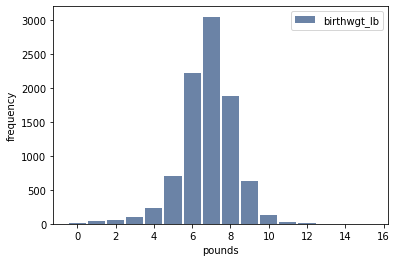

<Figure size 576x432 with 0 Axes>

In [29]:
import thinkstats2, thinkplot
live = df[df.outcome == 1]
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency');

In [30]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
display(mean, var, std)

38.56055968517709

7.302662067826851

2.702343810070593

This example looks up one respondent and prints a list of outcomes for her pregnancies:

In [9]:
caseid=10229
preg_map = nsfg.MakePregMap(df)
indices = preg_map[caseid]
df.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

### First Births Comparison

In [27]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [28]:
first_hist = thinkstats2.Hist(firsts.prglngth, label="first")
other_hist = thinkstats2.Hist(others.prglngth, label="other")

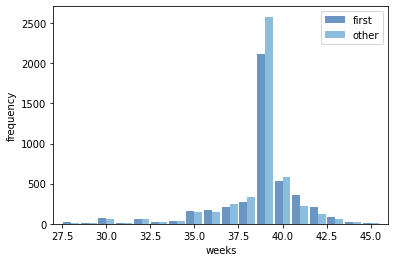

<Figure size 576x432 with 0 Axes>

In [31]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align="right", width=width)
thinkplot.Hist(other_hist, align="left", width=width)
thinkplot.Show(xlabel="weeks", ylabel="frequency",xlim=[27, 46]);